In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import os
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [4]:
def vector_coefficient(U, df): 
    top_2_U = U[:, :2]
    print(np.shape(top_2_U))    
    df['top_1_coefficient'] = top_2_U[:, 0]  # First singular vector coefficient
    df['top_2_coefficient'] = top_2_U[:, 1]  # Second singular vector coefficient
    return df 


In [5]:
def plot_top2(df): 
    colors = []
    for index, row in df.iterrows():
        if row['N'] == 1:
            colors.append('grey')
        elif row['D'] == 1:
            colors.append('red')
        elif row['G'] == 1:
            colors.append('yellow')
        elif row['C'] == 1:
            colors.append('green')
        elif row['A'] == 1:
            colors.append('orange')
        elif row['H'] == 1:
            colors.append('pink')
        elif row['M'] == 1:
            colors.append('blue')
        elif row['O'] == 1:
            colors.append('purple')
    df.plot.scatter(x='top_1_coefficient', y='top_2_coefficient', c=colors)

In [6]:
def plot_subplots(df): 
    indicators = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

    # Create an 8x8 grid of subplots
    fig, axes = plt.subplots(8, 8, figsize=(20, 20))

    # Iterate over the grid of subplots (8x8)
    for i in range(8):
        for j in range(8):
            # Select two indicator variables to compare
            var1 = indicators[i]
            var2 = indicators[j]

            # Filter the data for the two indicator variables
            # Points where var1 == 1 and var2 == 0 (first class)
            class_1 = df[(df[var1] == 1) & (df[var2] == 0)]
            # Points where var1 == 0 and var2 == 1 (second class)
            class_2 = df[(df[var1] == 0) & (df[var2] == 1)]

            # Scatter plot for the first class (using color 'red')
            axes[i, j].scatter(class_1['top_1_coefficient'], class_1['top_2_coefficient'], color='red', label=var1, alpha=0.2)
            
            # Scatter plot for the second class (using color 'blue')
            axes[i, j].scatter(class_2['top_1_coefficient'], class_2['top_2_coefficient'], color='blue', label=var2, alpha=0.2)
            
            # Set plot labels
            axes[i, j].set_xlabel('Top Singular Vector 1')
            axes[i, j].set_ylabel('Top Singular Vector 2')
            axes[i, j].set_title(f'{var1} vs {var2}')

            # Optionally add a legend
            axes[i, j].legend()

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()
    plt.clf()

# Data 

In [9]:

filtered_df2 = pd.read_csv('data/filtered_df2.csv')

image_files = list(filtered_df2['Image']) 

sample_img = Image.open("data/eyeball_img/" + image_files[0])
M, N = sample_img.size
print(f"Image Dimensions: {M}, {N}")
print("Number of Images: ", len(image_files))


images_array = np.zeros((len(image_files), M * N * 3), dtype=np.float32)

for i, file in enumerate(image_files):
    img = Image.open("data/eyeball_img/" + file).convert('RGB')
    img_array = np.asarray(img, dtype=np.float32) / 255.0  # normalize to [0,1]
    images_array[i, :] = img_array.flatten()  # flatten



Image Dimensions: 1024, 512
Number of Images:  2589


# K-val = 2

In [11]:
"""
k_val int, default: 6
Number of singular values and singular vectors to compute. 
Must satisfy 1 <= k <= kmax, where kmax=min(M, N) for solver='propack' and kmax=min(M, N) - 1 otherwise.
"""
U, S, Vt = svds(images_array, k=2) 


df = vector_coefficient(U, filtered_df2)

(2589, 2)


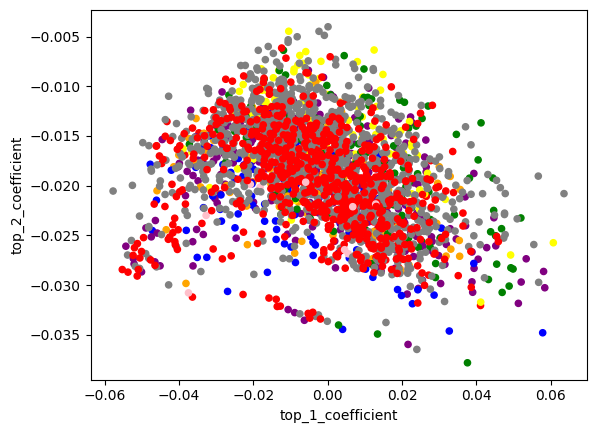

In [12]:
plot_top2(df)

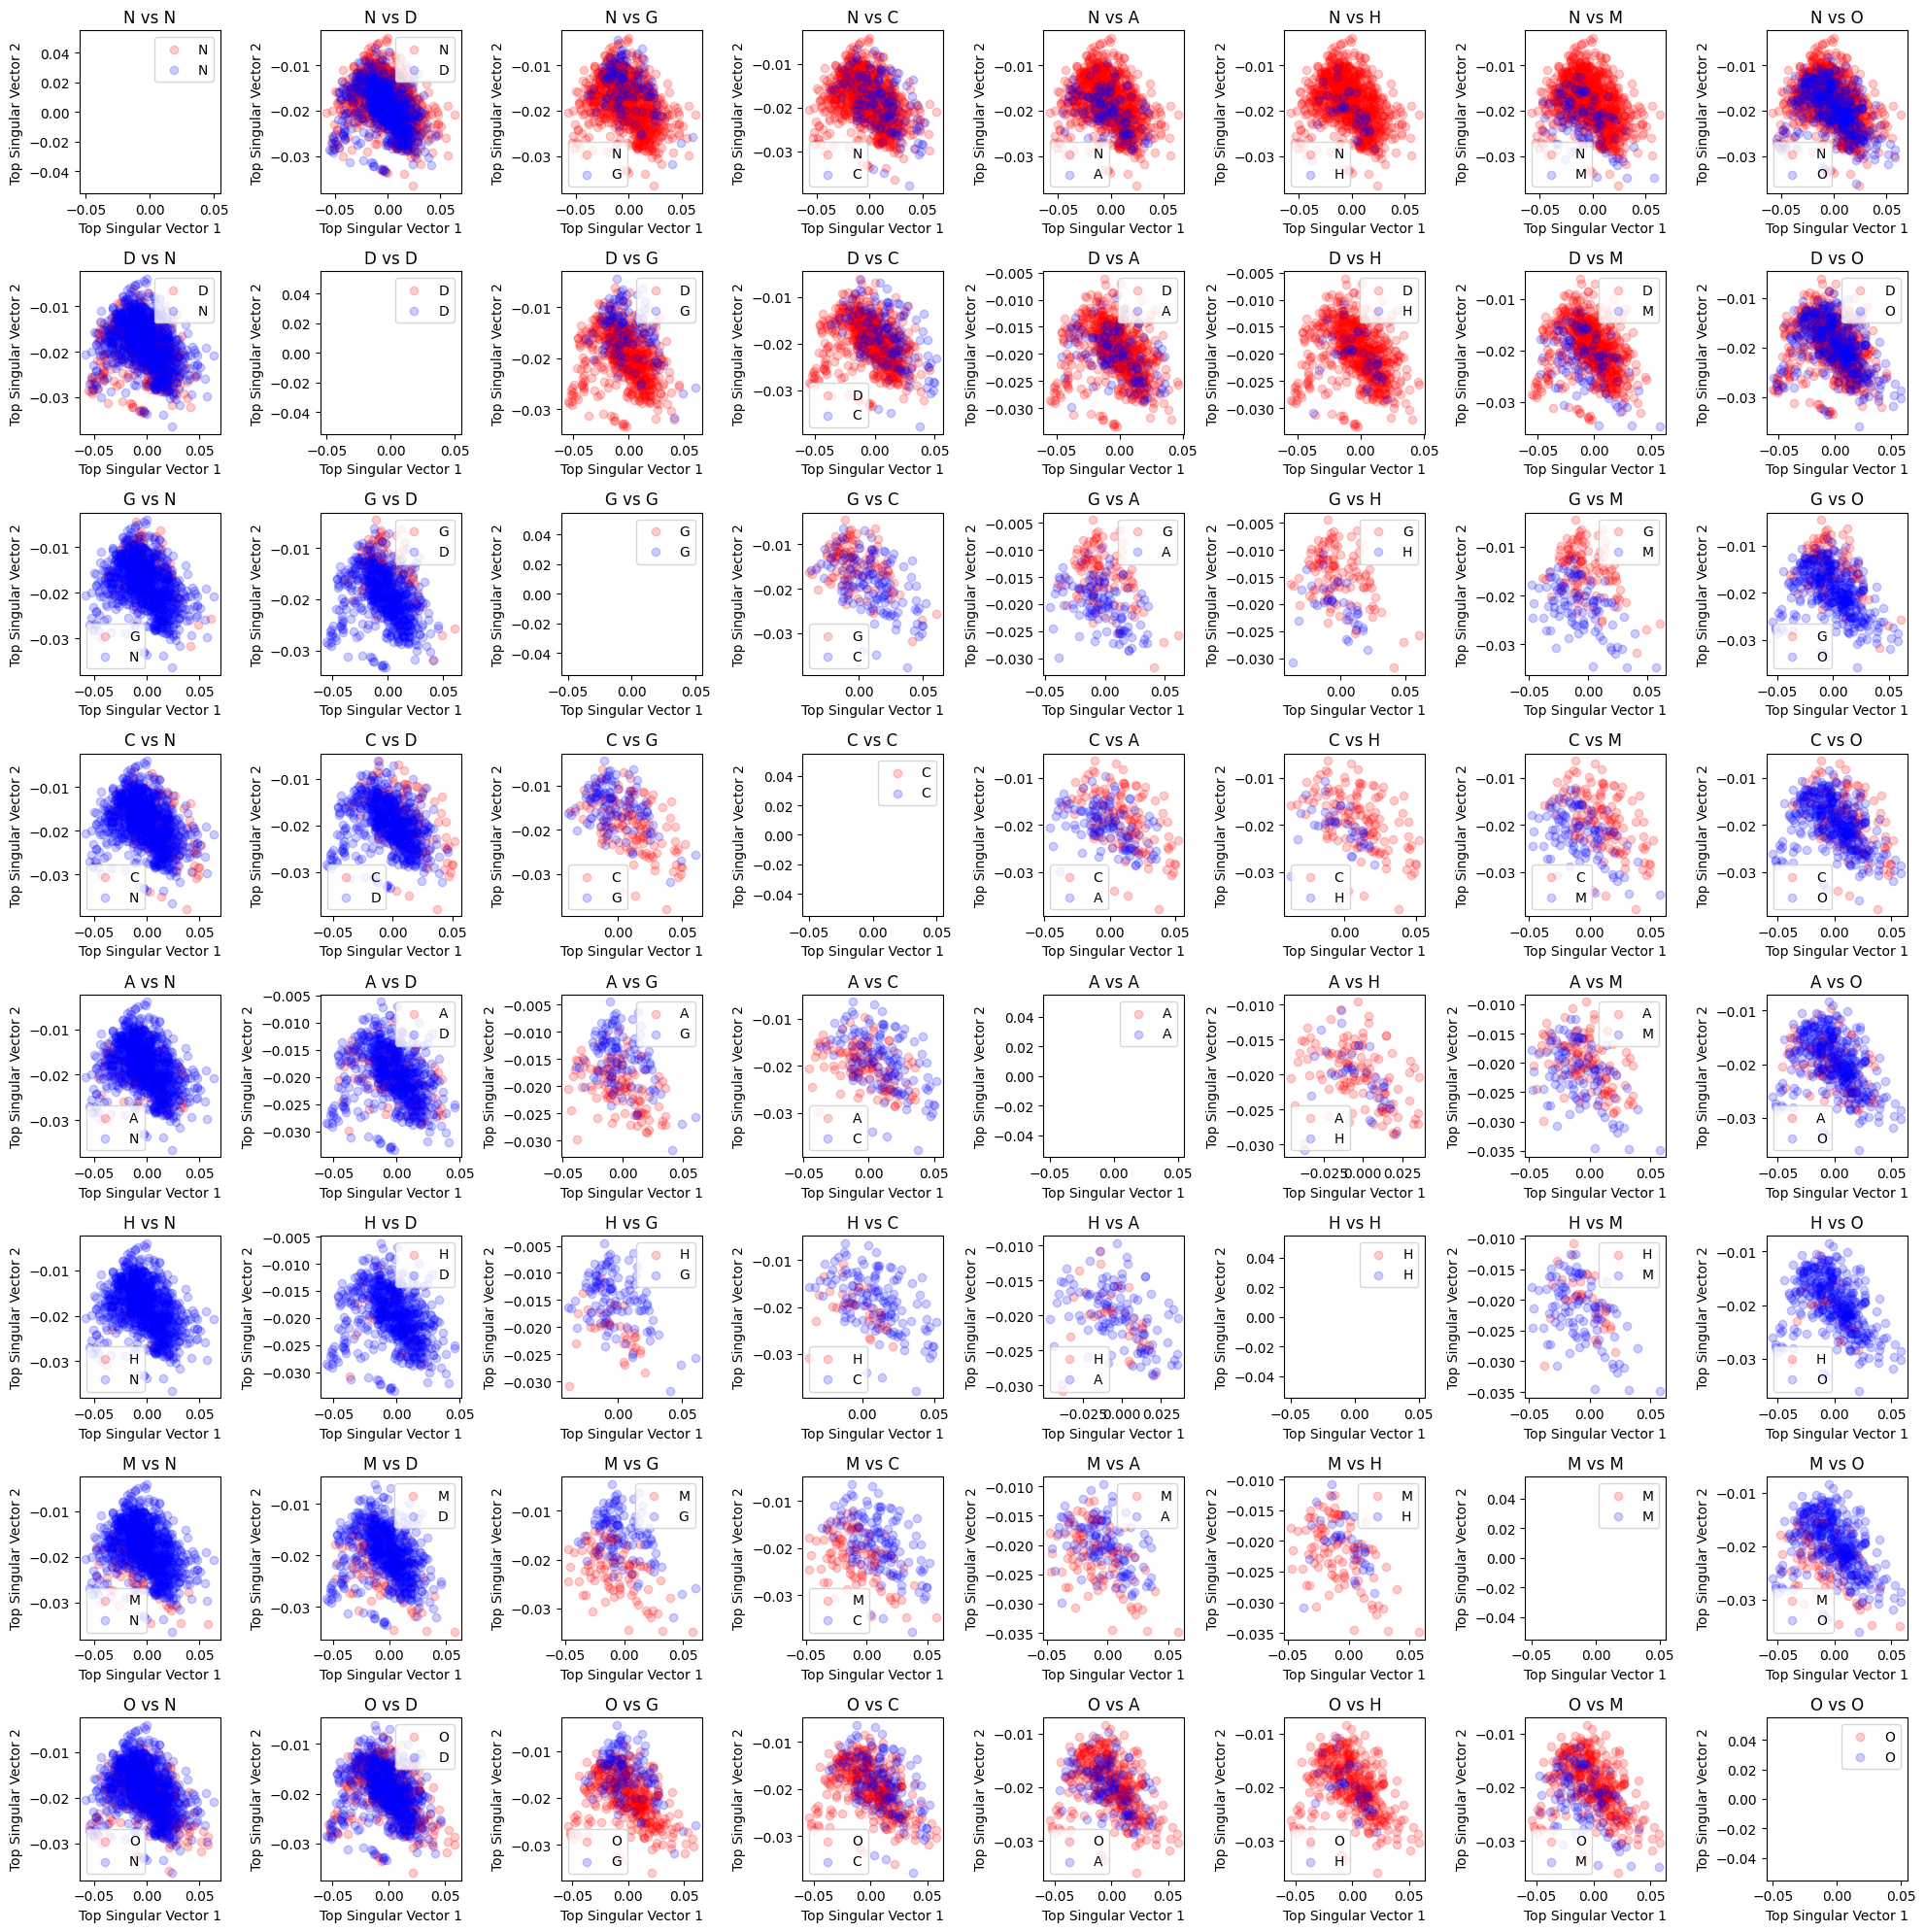

<Figure size 640x480 with 0 Axes>

In [13]:
plot_subplots(df)

# K = 100 

In [14]:
U, S, Vt = svds(images_array, k=100) 
df = vector_coefficient(U, filtered_df2)

(2589, 2)


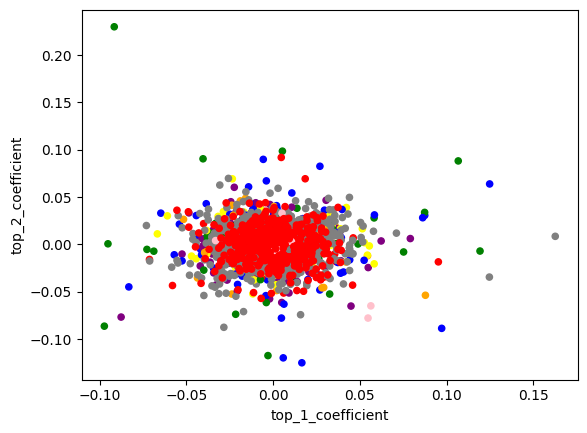

In [15]:
plot_top2(df)

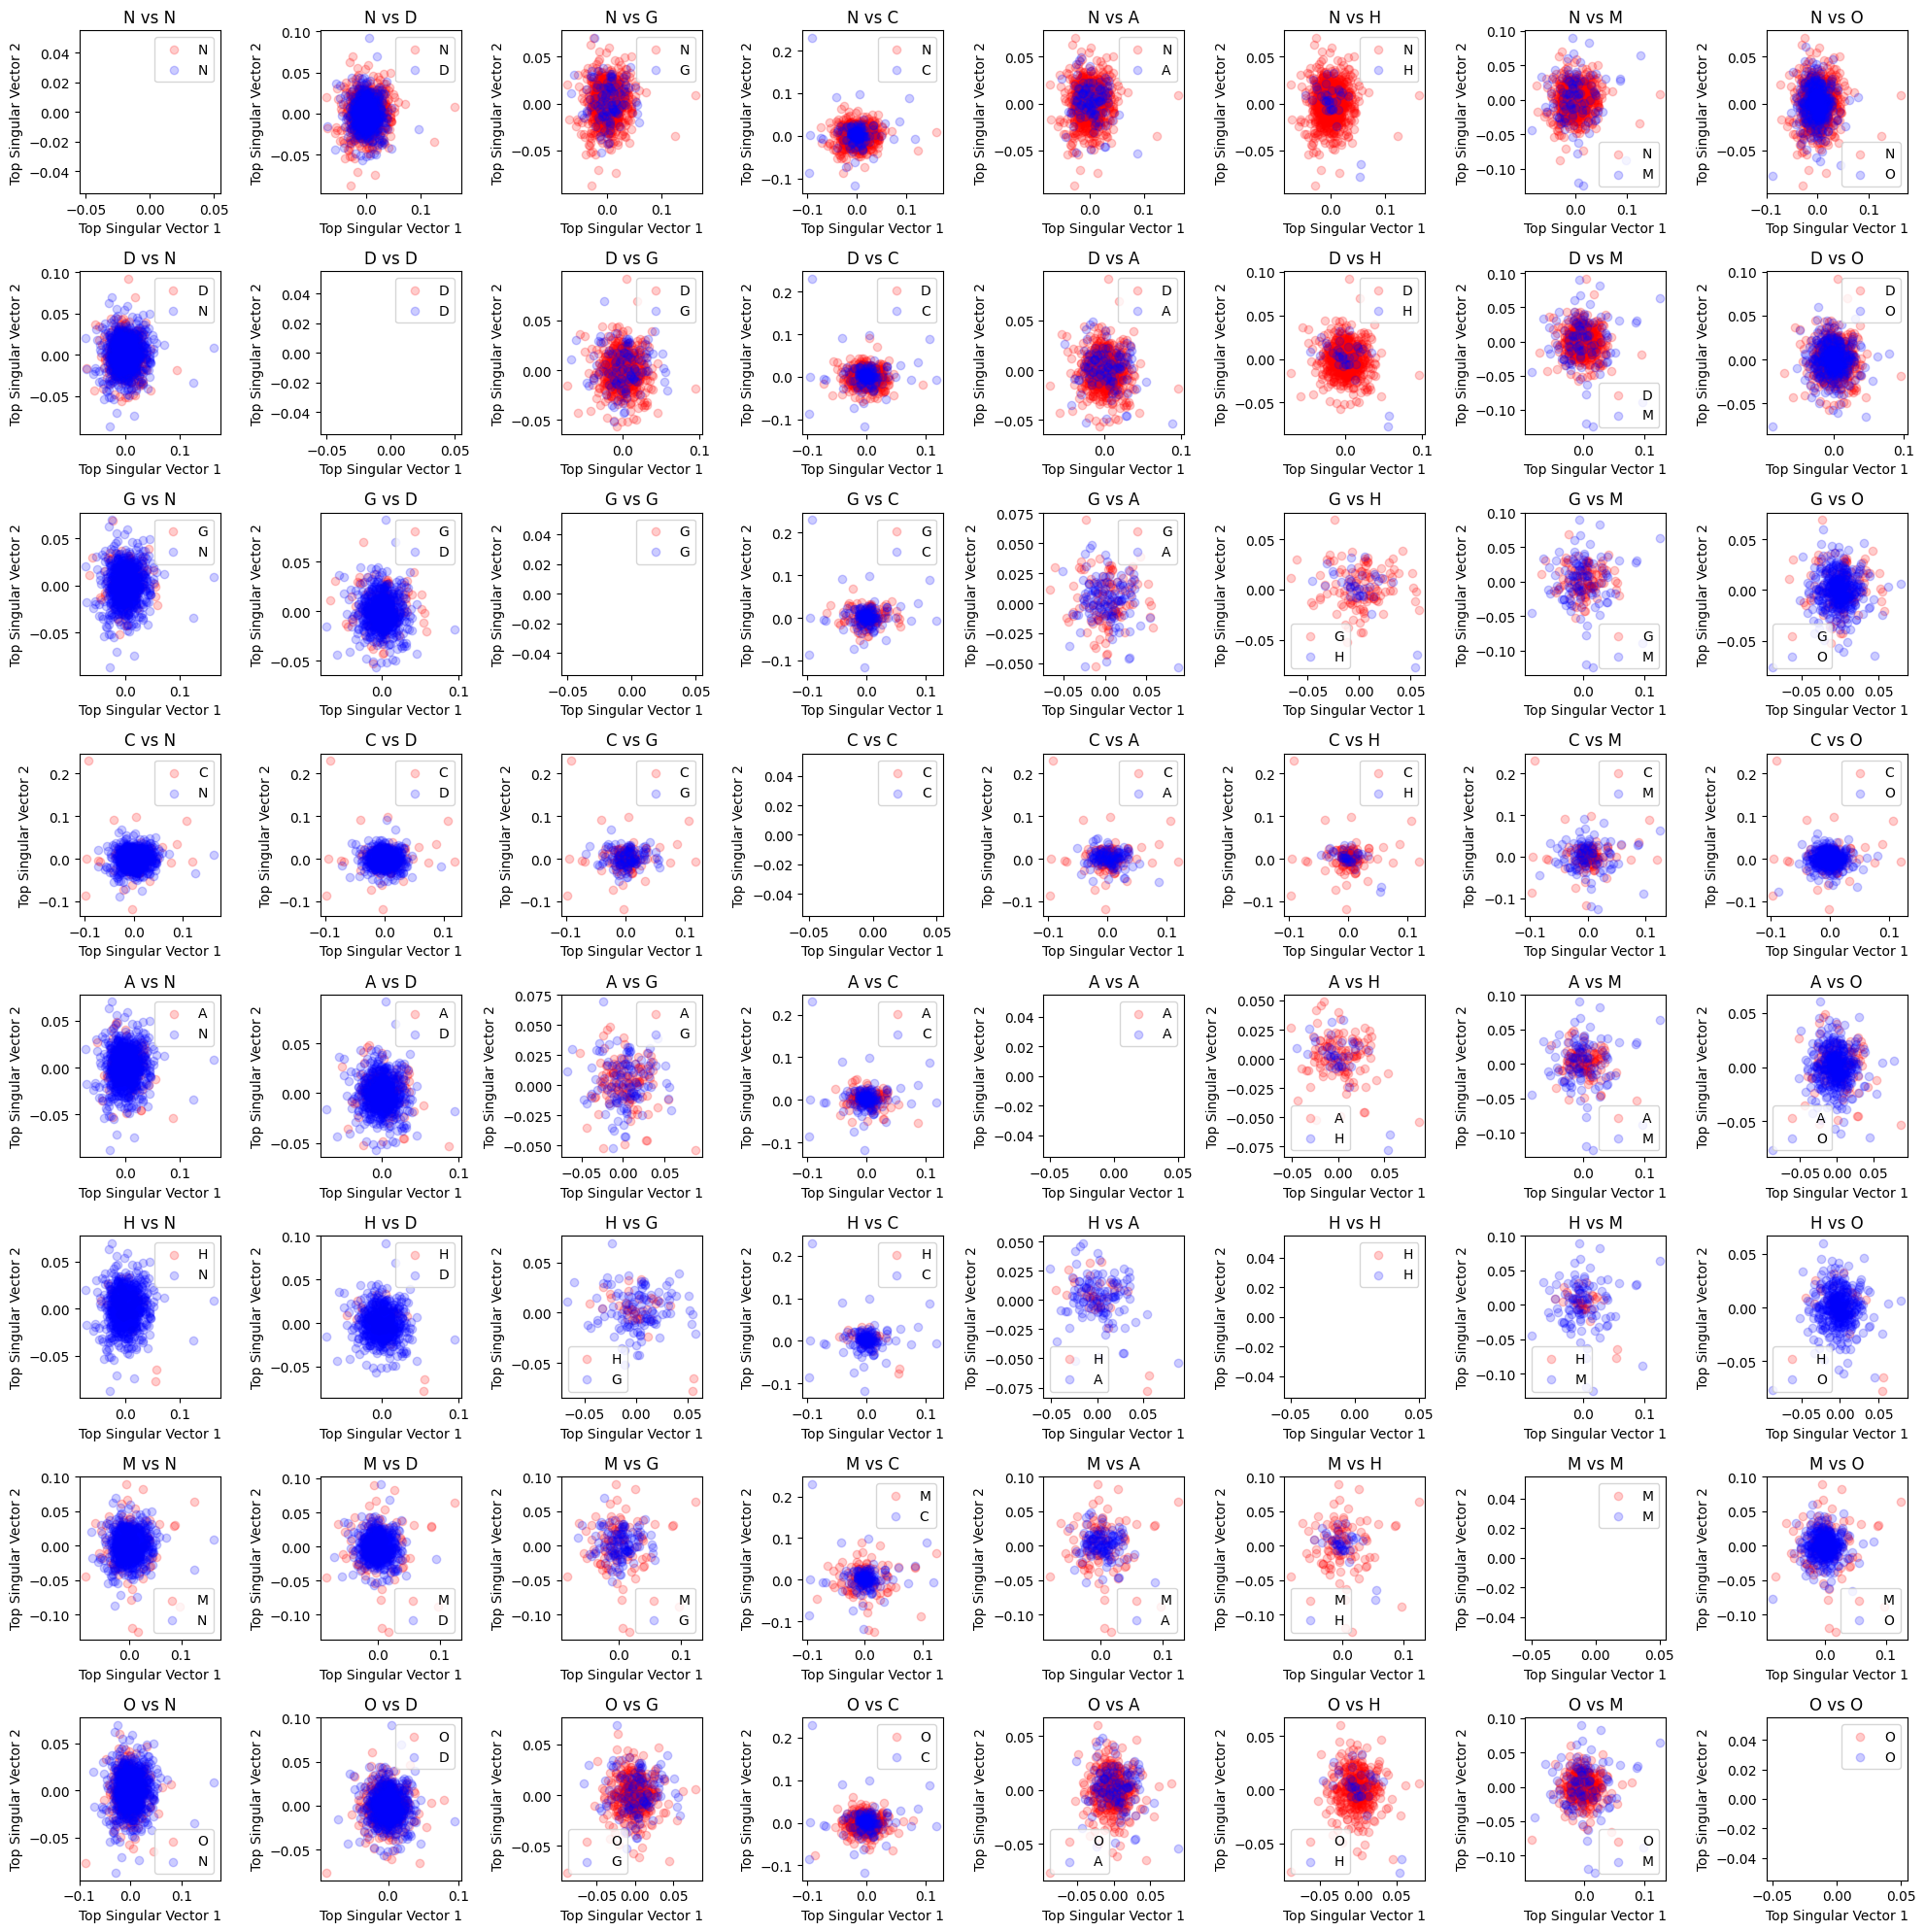

<Figure size 640x480 with 0 Axes>

In [16]:
plot_subplots(df)

# K = min(M,N)

In [17]:
print(min(M,N))
U, S, Vt = svds(images_array, k=min(M,N)) 
df = vector_coefficient(U, filtered_df2)

512
(2589, 2)


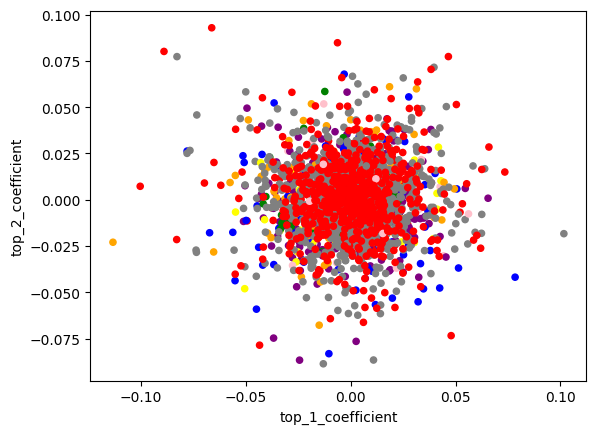

In [18]:
plot_top2(df)

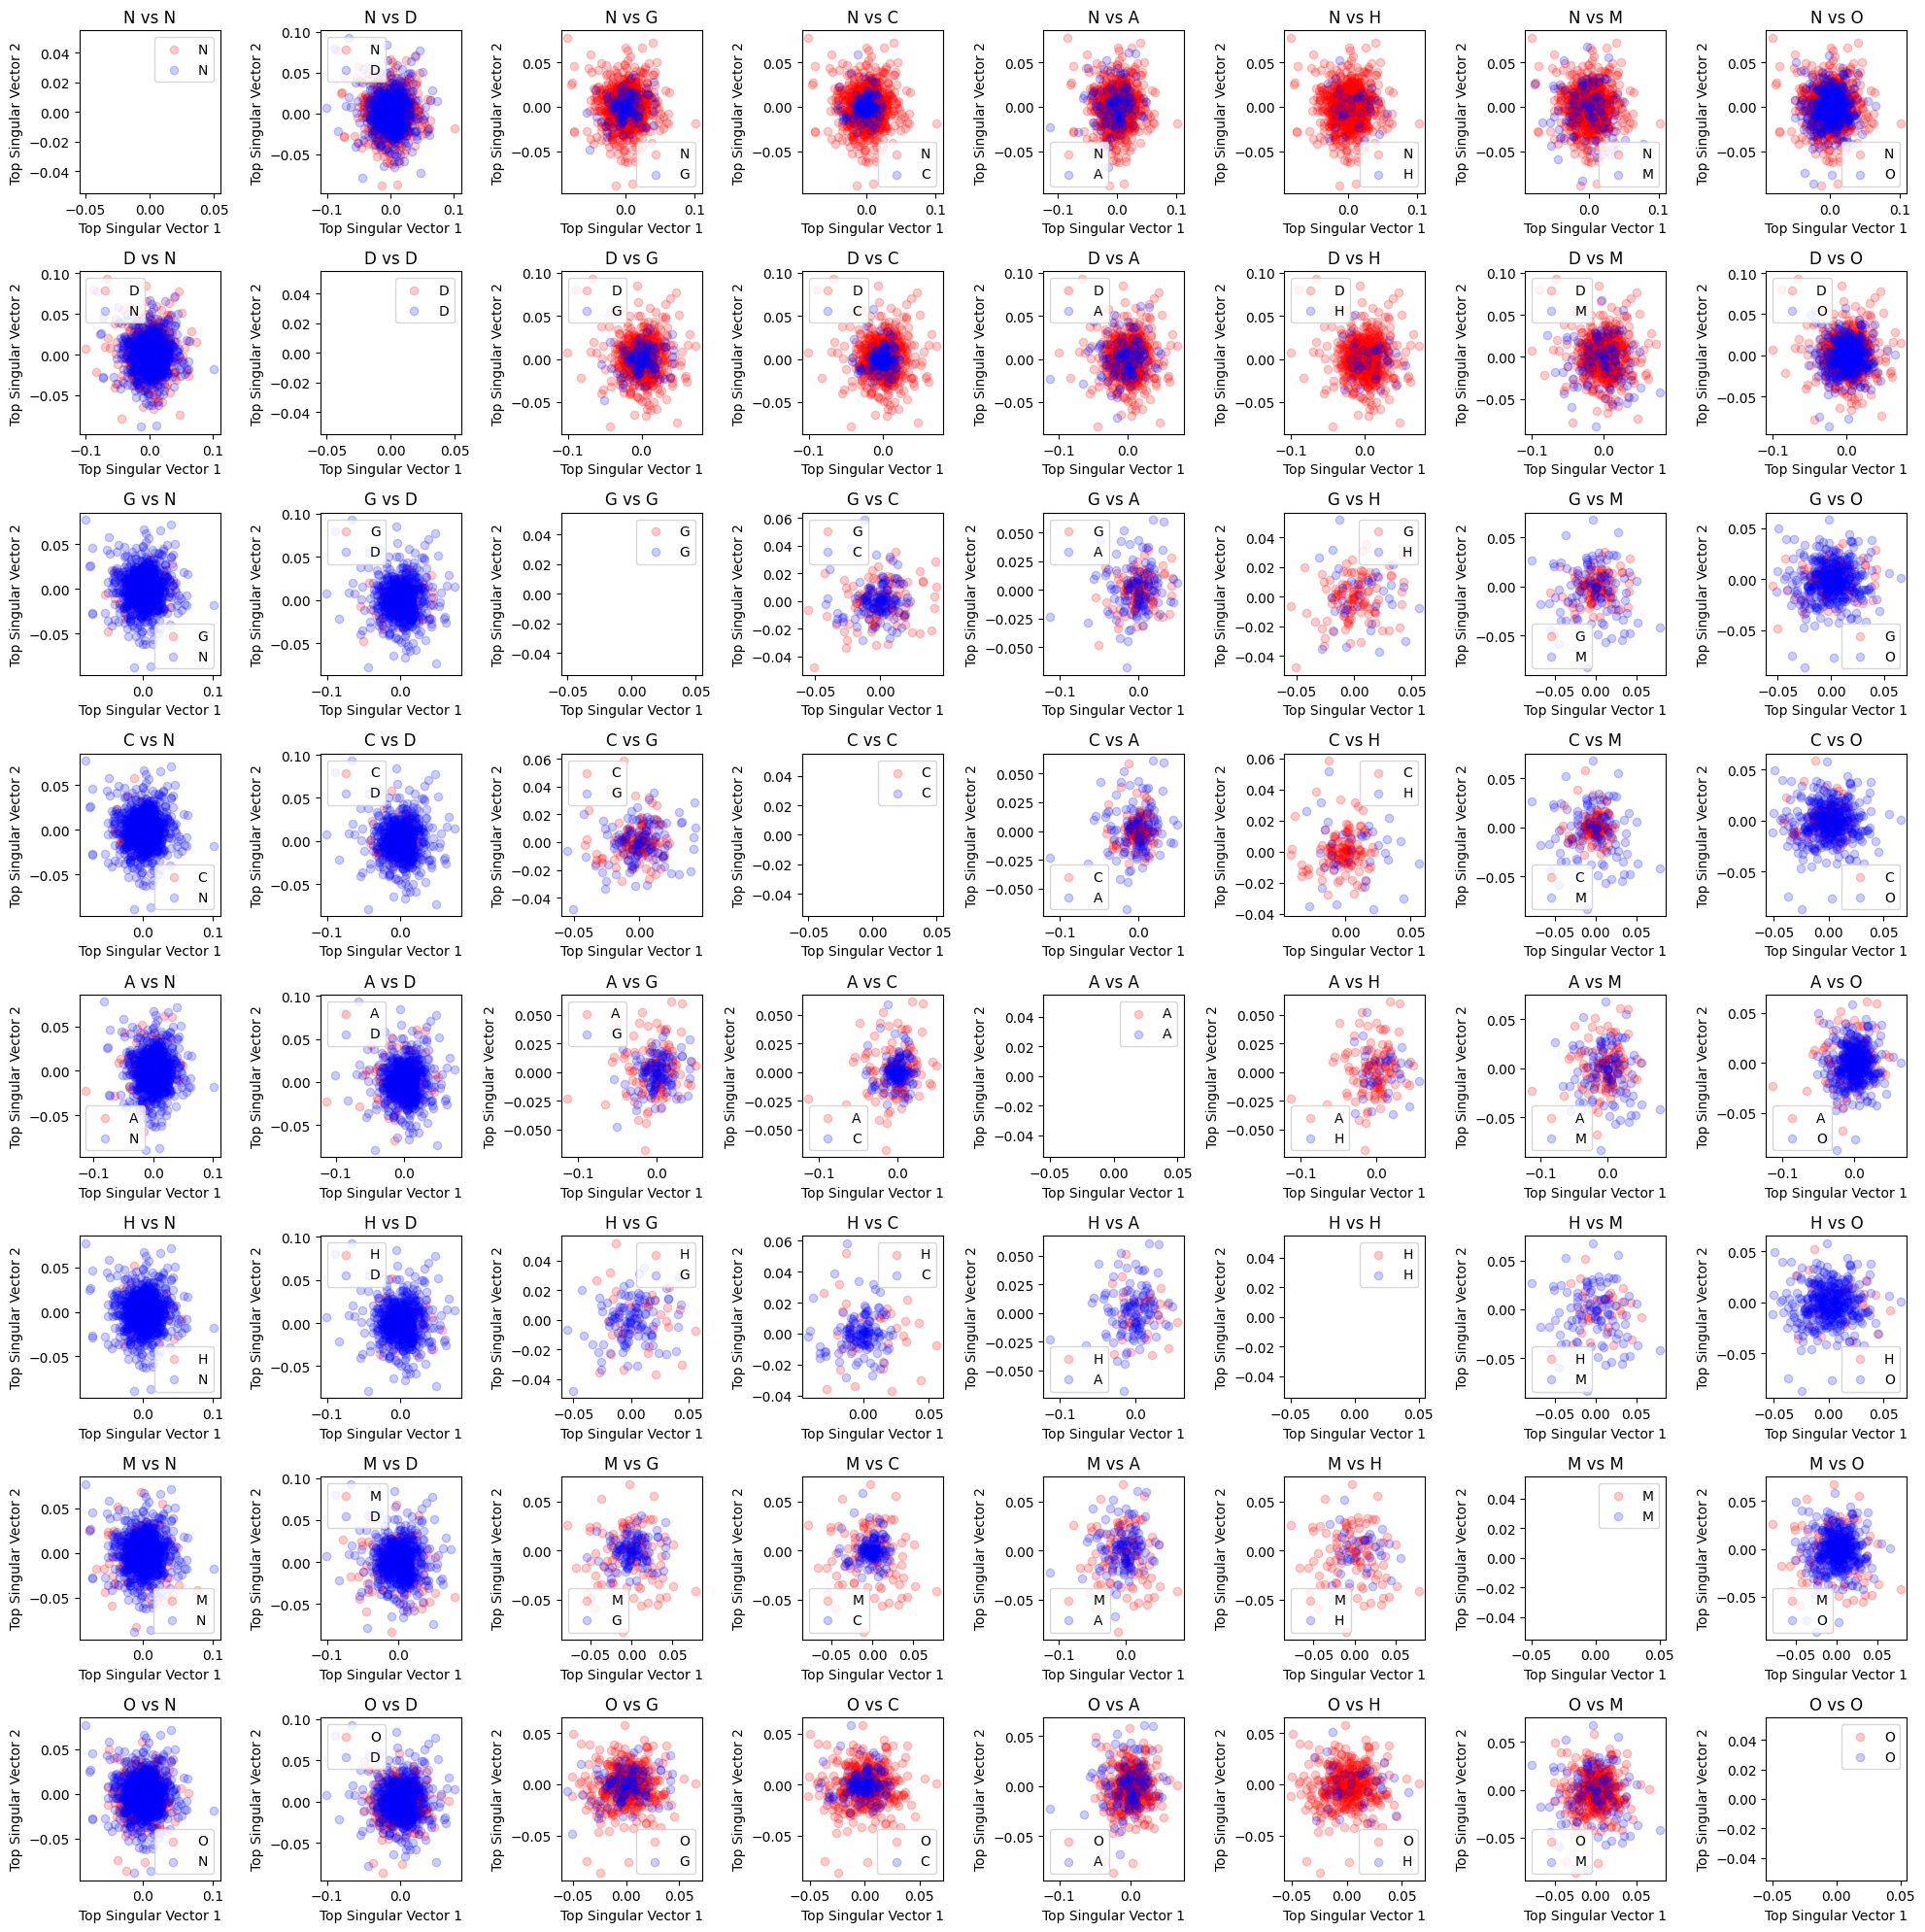

<Figure size 640x480 with 0 Axes>

In [19]:
plot_subplots(df)